In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
import time as t
from sklearn.model_selection import train_test_split

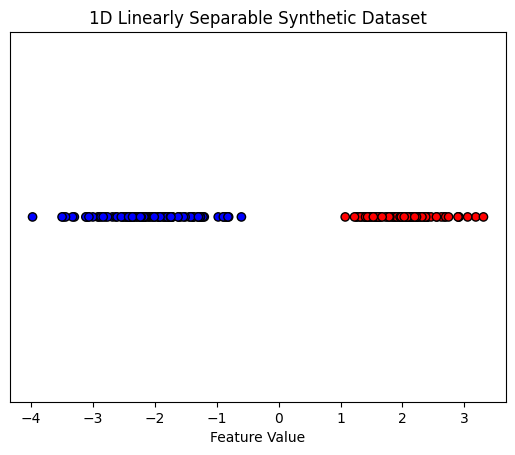

In [55]:
import numpy as np
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt

X, y = make_classification(
    n_samples=200,
    n_features=1,
    n_redundant=0,
    n_informative=1,
    n_clusters_per_class=1,
    class_sep=2.0,
    random_state=42
)

y = 2 * y - 1

plt.scatter(X[:, 0], np.zeros_like(X[:, 0]), c=y, cmap='bwr', edgecolors='k')
plt.title("1D Linearly Separable Synthetic Dataset")
plt.xlabel("Feature Value")
plt.yticks([]) 
plt.show()



In [56]:
xTrain, xTest, yTrain, yTest = train_test_split(X, y)

In [57]:
class SupportVectorMachines:
    def __init__(self, X, y, marginPenalty):
        self.X, self.y = X, y
        self.weights, self.bias = np.zeros((self.X.shape[1])), 0
        self.C = marginPenalty

    def predict(self, x):
        return (self.weights * x) + self.bias

    def hingeLoss(self, yTrue, yPred):
        return np.maximum(1 - yTrue * yPred, 0)

    def minimizingTerm(self, yTrue, yPred):
        regTerm = 0.5 * np.sum(self.weights**2)
        hingeLoss = np.sum(self.hingeLoss(yTrue, yPred))

        return regTerm + self.C * hingeLoss

    def gradientDescentStep(self, lr):
        condition = self.predict(self.X) < 1
        grad = self.weights.copy()
        grad = np.expand_dims(grad, 1)
        # print(self.y[condition.squeeze(), np.newaxis].shape, self.predict(self.X)[condition, np.newaxis].shape)
        # print(self.hingeLoss(self.y[condition.squeeze(), np.newaxis], self.predict(self.X)[condition, np.newaxis]).shape)
        # print(grad.shape, (self.C*np.sum(self.hingeLoss(self.y[condition.squeeze(), np.newaxis], self.predict(self.X)[condition, np.newaxis]), axis=0).reshape(-1, 1)).shape)

        if np.any(condition):
            # grad -= self.C * np.sum(self.hingeLoss(self.y[condition.squeeze(), np.newaxis], self.predict(self.X)[condition, np.newaxis]), axis=0).reshape(-1, 1)
            grad -= self.C * np.sum(self.hingeLoss(self.y[condition.squeeze(), np.newaxis], self.predict(self.X)[condition, np.newaxis]), axis=0).reshape(-1, 1)
                    
        self.weights -= grad.squeeze() * lr
                
        biasGrad = -1 * self.C * np.sum(self.y[condition.squeeze()])
        self.bias -= biasGrad * lr

svm = SupportVectorMachines(xTrain, yTrain, 1)
tIterator = tqdm(range(100))
for _ in tIterator:
    svm.gradientDescentStep(0.0001)
    tIterator.set_postfix({'loss=':np.sum(svm.hingeLoss(yTest.reshape(-1, 1), svm.predict(xTest)), axis=0)})

100%|██████████| 100/100 [00:00<00:00, 789.76it/s, loss==[4.79331556]]


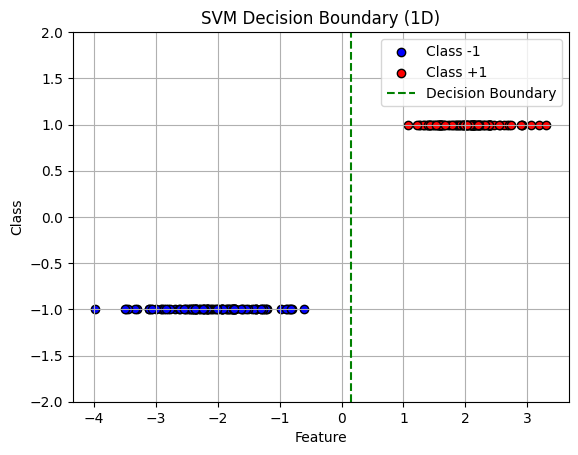

In [58]:
xLine = np.linspace(X.min() - 1, X.max() + 1, 500).reshape(-1, 1)
yPred = svm.predict(xLine)

boundary = xLine[np.argmin(np.abs(yPred))]

plt.scatter(X[y == -1], y[y == -1], color='blue', label='Class -1', edgecolors='k')
plt.scatter(X[y == 1], y[y == 1], color='red', label='Class +1', edgecolors='k')

plt.axvline(boundary, color='green', linestyle='--', label='Decision Boundary')

plt.ylim(-2, 2)
plt.legend()
plt.title("SVM Decision Boundary (1D)")
plt.xlabel("Feature")
plt.ylabel("Class")
plt.grid(True)
plt.show()
